# Subset NetCDF File
This jupyter notebook demonstrates how to read and subset data from NetCDF files. The functionality is similar to that provided in the `netcdf2ascii.py` script, but allows the user to interactively specify output limited to certain predefined subset areas (e.g. water management districts or FIPS county codes).

First, import some libraries (this requires the `netCDF4` library to be installed).

In [1]:
import os
import goeset
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# change default sans-serif font
mpl.rcParams['font.sans-serif'] = 'Univers 57 Condensed' 

Next, create a `goeset.GoesNetcdfFile` object:

In [2]:
fname = r'data\fl.et.2019.v.1.0.nc'
ncf = goeset.GoesNetcdfFile(fname)

### Let's take a look at what's in the netCDF file.
Print a list of the variables contained in the netCDF file.

In [3]:
ncf.names

['lat',
 'lon',
 'time',
 'x',
 'y',
 'Lambert_Conformal',
 'ETo',
 'PET',
 'Solar',
 'Albedo',
 'Tmin',
 'Tmax',
 'RHmin',
 'RHmax',
 'ws2m',
 'SolarCode']

Print a list of times in the netCDF file.

In [4]:
ncf.times

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

### Now let's tabularize the data.
Note: The `tabularize()` function casts the `numpy.ndarray` data from the netCDF file into a `pandas.DataFrame` object that is structured like the legacy ASCII files. We can use the unique values of the "wmd" and "county_cd" fields of the GOES points shapefile (shp\goes_pts.shp) to subset the output in the next step.

In [5]:
tab = ncf.tabularize()
tab.head()

,YYYYMMDD,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
184717,20190101,24.5539,-82.1128,8390,3.348310,3.726859,15.430000,0.048,20.076233,27.221252,55.518726,97.905746,5.812510,SFWMD,087
184733,20190101,24.5539,-81.8069,8406,3.031471,3.817579,16.309999,0.136,20.086761,27.638794,55.489677,98.440666,5.717568,SFWMD,087
184734,20190101,24.5539,-81.7878,8407,3.076512,3.800790,16.059999,0.121,20.084595,27.662476,55.505367,98.455017,5.715861,SFWMD,087
184244,20190101,24.5719,-82.0937,8865,3.556101,3.794271,16.370001,0.047,20.051239,27.245117,55.404552,97.972313,5.774130,SFWMD,087
184262,20190101,24.5719,-81.7495,8883,3.314718,3.820512,16.290001,0.089,20.051697,27.715668,55.433819,98.503807,5.683390,SFWMD,087


Let's look at the unique values of the `wmd` and `county_cd` fields. We can use these to select a subset of data we are interested in.

In [6]:
tab.wmd.unique(), tab.county_cd.unique()

(array(['SFWMD', 'SWFWMD', 'SJRWMD', 'SRWMD', 'NWFWMD'], dtype=object),
 array(['087', '025', '021', '011', '051', '071', '099', '015', '043',
        '115', '085', '093', '027', '055', '081', '111', '049', '061',
        '103', '057', '105', '097', '009', '101', '119', '069', '095',
        '053', '117', '127', '017', '083', '075', '035', '029', '107',
        '001', '041', '037', '109', '123', '045', '019', '007', '067',
        '023', '121', '125', '005', '129', '077', '065', '031', '003',
        '013', '079', '073', '033', '131', '089', '047', '113', '091',
        '039', '133', '063', '059'], dtype=object))

Select data for just the Southwest Florida Water Management District:

In [7]:
swf = tab[tab.wmd == 'SWFWMD']
print(swf.wmd.unique())
swf.head()

['SWFWMD']


,YYYYMMDD,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
125944,20190101,26.7814,-82.0554,67169,2.534679,2.436079,12.74,0.040,16.637360,28.659698,49.538528,99.960808,1.782481,SWFWMD,015
125945,20190101,26.7814,-82.0363,67170,2.409537,2.419757,12.51,0.056,16.579529,28.696594,49.155037,99.920143,1.766204,SWFWMD,015
125946,20190101,26.7814,-82.0172,67171,2.397363,2.393459,12.15,0.042,16.534973,28.729736,48.787460,99.884010,1.752132,SWFWMD,015
125947,20190101,26.7814,-81.9981,67172,2.182475,2.302735,10.98,0.037,16.502930,28.759186,48.436802,99.852394,1.740403,SWFWMD,015
125948,20190101,26.7814,-81.9790,67173,2.318050,2.361345,11.66,0.036,16.482452,28.785034,48.103905,99.825241,1.731138,SWFWMD,015


Now we can save the tabularized, subsetted data to a file.

In [8]:
swf.to_csv(r'data\swfwmd_2019.txt', index=False, sep='\t', float_format='%9.3f')

Now plot the resulting ASCII file to verify the output:

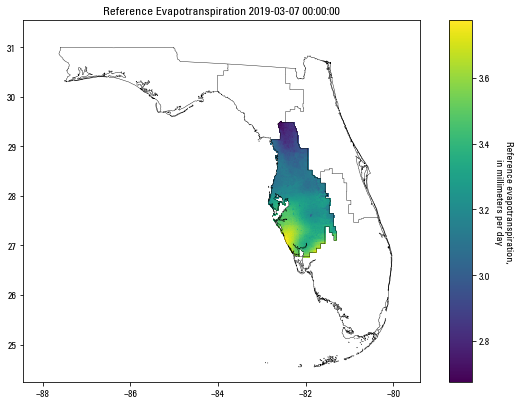

In [9]:
# Read data using the GoesAsciiFile.get_array() function
etfile = goeset.GoesAsciiFile(r'data\swfwmd_2019.txt')
plotable = etfile.get_array('ETo')

# Create the plot
fig = plt.figure(figsize=(8.5, 11))
ax = fig.add_subplot(111, aspect='equal')
idx = 65
date = ncf.times[idx]
ax.set_title(f'Reference Evapotranspiration {date}')
xx, yy = np.meshgrid(ncf.longitude, ncf.latitude)
quadmesh = ax.pcolormesh(xx, yy, plotable[idx])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
cb = plt.colorbar(quadmesh, cax=cax)
cb.ax.set_ylabel('Reference evapotranspiration,\nin millimeters per day', rotation=-90, va="bottom")

fname = os.path.join('..', 'shp', 'FL_WMD.shp')
shp = gpd.read_file(fname)
shp.plot(ax=ax, lw=.4, color='k')

plt.show()

We can also combine multiple areas to get more customized output. Let's get a couple of Districts plus Brevard County:

In [10]:
wmds = ['NWFWMD', 'SFWMD']
custom = tab[((tab.wmd.isin(wmds)) | (tab.county_cd == '009'))]
print(custom.wmd.unique(), custom.county_cd.unique())
custom

['SFWMD' 'SJRWMD' 'NWFWMD'] ['087' '025' '021' '011' '051' '071' '099' '015' '043' '085' '093' '055'
 '111' '105' '097' '009' '095' '037' '045' '005' '129' '077' '065' '013'
 '073' '033' '131' '113' '091' '039' '133' '063' '059']


,YYYYMMDD,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
184717,20190101,24.5539,-82.1128,8390,3.348310,3.726859,15.430000,0.048,20.076233,27.221252,55.518726,97.905746,5.812510,SFWMD,087
184733,20190101,24.5539,-81.8069,8406,3.031471,3.817579,16.309999,0.136,20.086761,27.638794,55.489677,98.440666,5.717568,SFWMD,087
184734,20190101,24.5539,-81.7878,8407,3.076512,3.800790,16.059999,0.121,20.084595,27.662476,55.505367,98.455017,5.715861,SFWMD,087
184244,20190101,24.5719,-82.0937,8865,3.556101,3.794271,16.370001,0.047,20.051239,27.245117,55.404552,97.972313,5.774130,SFWMD,087
184262,20190101,24.5719,-81.7495,8883,3.314718,3.820512,16.290001,0.089,20.051697,27.715668,55.433819,98.503807,5.683390,SFWMD,087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14869,20191231,30.9850,-85.0956,177926,1.170081,1.588404,13.070000,0.087,4.237610,13.773956,42.797123,90.848106,2.629499,NWFWMD,063
14870,20191231,30.9850,-85.0765,177927,1.207474,1.593193,13.020000,0.075,4.232208,13.749329,42.927540,90.587746,2.654957,NWFWMD,063
14871,20191231,30.9850,-85.0574,177928,1.244119,1.598768,13.040000,0.065,4.222290,13.725800,43.068901,90.327087,2.679016,NWFWMD,063
14872,20191231,30.9850,-85.0382,177929,1.256963,1.603812,13.070000,0.062,4.207855,13.703339,43.222057,90.068787,2.701458,NWFWMD,063


In [11]:
custom.to_csv(r'data\custom_2019.txt', index=False, sep='\t', float_format='%9.3f')

Now plot the resulting ASCII file to verify the output:

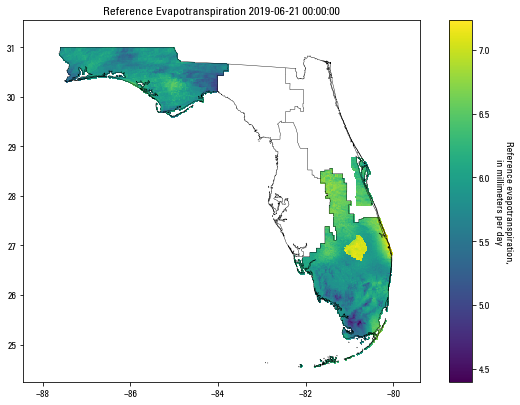

In [12]:
# Read data using the GoesAsciiFile.get_array() function
etfile = goeset.GoesAsciiFile(r'data\custom_2019.txt')
plotable = etfile.get_array('ETo')

# Create the plot
fig = plt.figure(figsize=(8.5, 11))
ax = fig.add_subplot(111, aspect='equal')
idx = 171
date = ncf.times[idx]
ax.set_title(f'Reference Evapotranspiration {date}')
xx, yy = np.meshgrid(ncf.longitude, ncf.latitude)
quadmesh = ax.pcolormesh(xx, yy, plotable[idx])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=.05)
cb = plt.colorbar(quadmesh, cax=cax)
cb.ax.set_ylabel('Reference evapotranspiration,\nin millimeters per day', rotation=-90, va="bottom")

fname = os.path.join('..', 'shp', 'FL_WMD.shp')
shp = gpd.read_file(fname)
shp.plot(ax=ax, lw=.4, color='k')

plt.show()

### Return Date Column as DateTime Objects
By returning the date column as a series of datetime objects, we can set it as the index and then cleanly slice data by date or date range.

In [13]:
def date_parser(x):
    from datetime import datetime
    return datetime.strptime(x, "%Y%m%d")

etfile = goeset.GoesAsciiFile(r'data\custom_2019.txt')

df = etfile.get_dataframe(parse_dates=['YYYYMMDD'], date_parser=date_parser)
df = df.set_index(['YYYYMMDD']).sort_index()
df.head()

,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
YYYYMMDD,,,,,,,,,,,,,,
2019-01-01,24.554,-82.113,8390,3.348,3.727,15.43,0.048,20.076,27.221,55.519,97.906,5.813,SFWMD,87
2019-01-01,24.554,-81.807,8406,3.031,3.818,16.31,0.136,20.087,27.639,55.490,98.441,5.718,SFWMD,87
2019-01-01,24.554,-81.788,8407,3.077,3.801,16.06,0.121,20.085,27.662,55.505,98.455,5.716,SFWMD,87
2019-01-01,24.572,-82.094,8865,3.556,3.794,16.37,0.047,20.051,27.245,55.405,97.972,5.774,SFWMD,87
2019-01-01,24.572,-81.749,8883,3.315,3.821,16.29,0.089,20.052,27.716,55.434,98.504,5.683,SFWMD,87


Show all data for February 14, 2019:

In [14]:
df['2019-02-14':'2019-02-14']

,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
YYYYMMDD,,,,,,,,,,,,,,
2019-02-14,24.554,-82.113,8390,4.260,2.867,20.60,0.043,12.759,21.634,66.965,98.064,4.861,SFWMD,87
2019-02-14,24.554,-81.807,8406,3.850,3.081,21.47,0.137,13.453,22.437,66.311,97.282,4.655,SFWMD,87
2019-02-14,24.554,-81.788,8407,3.961,3.083,21.41,0.121,13.508,22.489,66.261,97.213,4.647,SFWMD,87
2019-02-14,24.572,-82.094,8865,4.203,2.899,20.95,0.061,12.676,21.683,66.845,98.003,4.829,SFWMD,87
2019-02-14,24.572,-81.749,8883,4.211,3.121,21.52,0.090,13.512,22.605,66.066,97.051,4.615,SFWMD,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-14,30.985,-85.096,177926,1.888,2.202,14.34,0.089,2.285,19.247,42.844,85.786,1.946,NWFWMD,63
2019-02-14,30.985,-85.076,177927,2.001,2.214,14.70,0.073,2.260,19.147,43.207,85.591,1.965,NWFWMD,63
2019-02-14,30.985,-85.057,177928,1.898,2.195,14.50,0.091,2.241,19.042,43.602,85.389,1.982,NWFWMD,63


Show all data for February 14, 2019 through March 16, 2019:

In [15]:
df['2019-02-14':'2019-03-16']

,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
YYYYMMDD,,,,,,,,,,,,,,
2019-02-14,24.554,-82.113,8390,4.260,2.867,20.60,0.043,12.759,21.634,66.965,98.064,4.861,SFWMD,87
2019-02-14,24.554,-81.807,8406,3.850,3.081,21.47,0.137,13.453,22.437,66.311,97.282,4.655,SFWMD,87
2019-02-14,24.554,-81.788,8407,3.961,3.083,21.41,0.121,13.508,22.489,66.261,97.213,4.647,SFWMD,87
2019-02-14,24.572,-82.094,8865,4.203,2.899,20.95,0.061,12.676,21.683,66.845,98.003,4.829,SFWMD,87
2019-02-14,24.572,-81.749,8883,4.211,3.121,21.52,0.090,13.512,22.605,66.066,97.051,4.615,SFWMD,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-16,30.985,-85.096,177926,1.186,2.400,7.06,0.098,11.158,17.074,43.360,76.414,3.013,NWFWMD,63
2019-03-16,30.985,-85.076,177927,1.236,2.394,7.13,0.081,11.132,17.042,43.834,76.365,3.024,NWFWMD,63
2019-03-16,30.985,-85.057,177928,1.227,2.378,7.08,0.081,11.097,17.011,44.331,76.346,3.035,NWFWMD,63


Show all data for June 2019:

In [16]:
df['2019-06']

,Lat,Lon,NRpix,PET,ETo,Solar,Albedo,Tmin,Tmax,RHmin,RHmax,ws2m,wmd,county_cd
YYYYMMDD,,,,,,,,,,,,,,
2019-06-01,24.554,-82.113,8390,8.038,4.914,26.88,0.043,22.757,31.242,57.283,92.414,0.055,SFWMD,87
2019-06-01,24.554,-81.807,8406,7.865,5.223,27.35,0.081,23.459,31.862,55.517,92.271,0.468,SFWMD,87
2019-06-01,24.554,-81.788,8407,7.424,5.195,27.10,0.116,23.499,31.905,55.378,92.281,0.497,SFWMD,87
2019-06-01,24.572,-82.094,8865,8.228,4.958,27.01,0.029,22.771,31.239,57.387,92.503,0.106,SFWMD,87
2019-06-01,24.572,-81.749,8883,7.505,5.281,27.36,0.116,23.550,31.961,55.273,92.433,0.585,SFWMD,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,30.985,-85.096,177926,7.343,5.111,24.04,0.059,24.935,32.847,54.175,91.599,1.143,NWFWMD,63
2019-06-30,30.985,-85.076,177927,7.483,5.280,25.04,0.075,24.900,32.817,54.208,91.628,1.143,NWFWMD,63
2019-06-30,30.985,-85.057,177928,7.543,5.148,24.31,0.046,24.865,32.787,54.259,91.670,1.143,NWFWMD,63
